In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Load Dataset

In [2]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [3]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


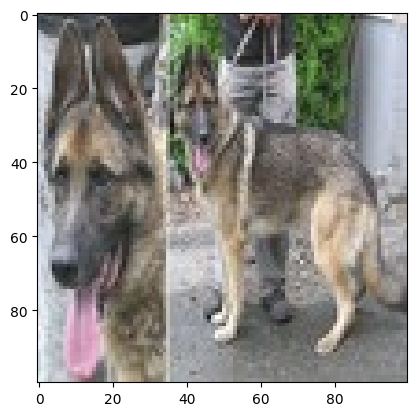

In [5]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model

In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [7]:
modle = Sequential()

modle.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
modle.add(MaxPooling2D((2,2)))

modle.add(Conv2D(32, (3,3), activation = 'relu'))
modle.add(MaxPooling2D((2,2)))

modle.add(Conv2D(32, (3,3), activation = 'relu'))
modle.add(MaxPooling2D((2,2)))

modle.add( Flatten())
modle.add(Dense(64, activation = 'relu'))
modle.add(Dense(1, activation = 'sigmoid'))

In [8]:
modle.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics =['accuracy'])

In [9]:
modle.fit(X_train, Y_train, epochs = 15, batch_size = 100)

Epoch 1/15
20/20 [==============================] - 11s 401ms/step - loss: 0.6858 - accuracy: 0.5370
Epoch 2/15
20/20 [==============================] - 8s 400ms/step - loss: 0.6567 - accuracy: 0.6090
Epoch 3/15
20/20 [==============================] - 8s 391ms/step - loss: 0.6126 - accuracy: 0.6660
Epoch 4/15
20/20 [==============================] - 8s 391ms/step - loss: 0.5792 - accuracy: 0.6965
Epoch 5/15
20/20 [==============================] - 8s 423ms/step - loss: 0.5609 - accuracy: 0.7075
Epoch 6/15
20/20 [==============================] - 9s 432ms/step - loss: 0.5319 - accuracy: 0.7365
Epoch 7/15
20/20 [==============================] - 8s 412ms/step - loss: 0.4905 - accuracy: 0.7660
Epoch 8/15
20/20 [==============================] - 8s 409ms/step - loss: 0.4876 - accuracy: 0.7690
Epoch 9/15
20/20 [==============================] - 11s 533ms/step - loss: 0.4489 - accuracy: 0.7965
Epoch 10/15
20/20 [==============================] - 9s 421ms/step - loss: 0.4159 - accuracy: 0.81

In [10]:
modle.evaluate(X_test,Y_test)

13/13 [==============================] - 3s 28ms/step - loss: 0.5764 - accuracy: 0.7175


[0.5763711929321289, 0.7174999713897705]

# Making Prediction

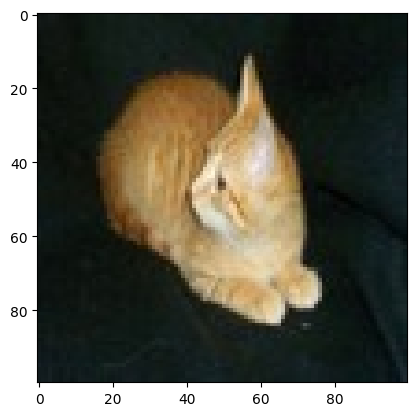

1/1 [==============================] - 0s 24ms/step
[[0.49560428]]
Our model says it is a :  cat


In [36]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
print(y_pred)
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'cat'
else:
    pred = 'dog'

print("Our model says it is a : ", pred)